# Problem Statement :
The are two datasets,First dataset is college which consist of 480 observations and 13 features while second dataset consist of 290 observations and 23 features.The goal is to classify which subject each college will choose to ensure good result from moocs and this would count towards NBAs points on innovative practices.

# Solution/Approach(Existing Solution)
All the solutions which are available on kaggle is only related to analysis of variables(ONLY few of variables not all) and no modeling part.<br/>
But i have broken the problem into 8 steps:-

# Solution/Approach(My Solution)
#### Steps
1. Reading csv/xlsx etc file and then checking dimension,few rows to know little about data etc and removing redundant columns
2. Variable identification to know about <b>continuous or categorical in nature</b> and filling missing value
3. Univariate analysis<br/>
    A. Continuous Variables<br/>
    Tabular and graphical method is used to know about <b>mean,median,mode,missing values,Q1,Q3,skewness,outliers</b> etc
    
    B. Categorical Variables<br/>
    Tabular and graphical method is used to know about number of times each value occuring in that particular column<br/>
    <br/>
4. Bivariate analysis<br/>
    Tabular and graphical method is used to know about relation between continuous-continuous variables using            
    <b>correlation</b> as well as <b>heat map</b>.
5. Missing value Treatment<br/>
    This step i had already performed in step 2
6. Outliers Treatment:<br/>
    Using <b>box plot</b>, i am able to find outliers then using <b>Q1-1.5(Q3-Q1)</b> and <b>Q3+1.5(Q3-Q1)</b> , i am replacing     that outliers with mean.
7. Variable Transormation:<br/>
    Using LabelEncoder from sckikit learn ,transforming categorical varaibles into numerical form as well as using MinMaxScaler     i had bring all values in range of 0 and 1.
    
8. Modeling:<br/>
   a.Separating indepedent and dependent variable from our data set<br/><br/>
   <b>8.1 Bagging and Boosting Techniques (Accuracy : 72%)</b><br/>
   <b>8.2 Logistic Regression(Accuracy : 79%)</b><br/>
   
   b.Finally comparing the <b>accuracy</b> of each of the model.<br/>
   
  <b>Note:</b><br/>
  I had found many observation from the given dataset during each section and i had written that observation in the notebook     itself at that place where i found.

# Rationale for selection of tools
1. Numpy python framework : It is best to perform any array calculation and widely used in educational sector.<br/>
2. Pandas python framework : It is used for dataframe manipulation (when data is in tabular form).<br/>
3. Scikit-learn python framework : It provides all types of machine learning algorithm(regression,classification etc) api and i am comfortable with it because i had solved all problems in last 6 months using this framework only.

# Assumptions :(exactly not Assumptions but some type of observation from dataset)
1. I had removed 7 columns from actual dataset after seeing their dependency on other columns or due to unique value(just like primay key)

# Code :

# 1. Exploring both the datasets : 

In [1]:
# importing frequently used libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the csv and excel file and checking their dimensions

kaggle=pd.read_csv('appendix.csv')
college=pd.read_excel('College1_Data.xlsx',skiprows=1)
kaggle.shape,college.shape

((290, 23), (480, 13))

In [3]:
# copying the original dataset so that after any manupulation we still have original datasets

kaggle_original=kaggle.copy()
college_original=college.copy()

In [4]:
# observing value of first 10 rows

kaggle.head(10)

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33
5,MITx,6.00x,02/04/2013,Introduction to Computer Science and Programming,Larry Rudolph,Computer Science,1,1,65380,6473,...,51.17,82.43,10.30,28.90,639.40,84.14,27.0,83.99,16.01,60.90
6,MITx,3.091x,02/05/2013,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,8270,838,...,65.16,80.25,10.22,23.49,68.11,59.29,27.0,73.30,26.70,58.99
7,MITx,14.73x,02/12/2013,The Challenges of Global Poverty,"Esther Duflo, Abhijit Banerjee","Government, Health, and Social Science",1,1,29044,6510,...,70.60,83.24,13.89,39.38,279.22,40.30,30.0,53.76,46.24,81.94
8,MITx,8.02x,02/18/2013,Electricity and Magnetism,"Walter Lewin, John Belcher, Peter Dourmashkin,...","Science, Technology, Engineering, and Mathematics",1,1,39178,3543,...,48.49,85.3,5.86,16.04,380.35,107.88,26.0,85.42,14.58,56.97
9,HarvardX,ER22x,03/02/2013,Justice,Michael Sandel,"Humanities, History, Design, Religion, and Edu...",1,1,58779,9425,...,51.07,---,21.86,20.98,186.61,13.67,30.0,60.42,39.58,69.78


In [5]:
kaggle['Course Title'].nunique()

202

In [6]:
kaggle['Course Subject'].nunique()

4

In [7]:
# observing value of first 10 rows

college.head(10)

,student_id,Video_Access,Practice_Problem_Access,Forum_Access,Marks_Assgnmt1,Video_Access.1,Practice_Problem_Access.1,Forum_Access.1,Marks_Assgnmt1.1,Video_Access.2,Practice_Problem_Access.2,Forum_Access.2,Marks_Assgnmt1.2
0,1.0,NaN,NaN,NaN,NaN,0.1815,0.4255,0.4925,0.8938,0.75,0.8468,0.35,0.7201
1,2.0,NaN,NaN,NaN,NaN,0.9350,0.4126,0.7105,0.8863,0.76,0.8171,1.00,0.8210
2,3.0,0.75,0.45,0.1012,0.8341,0.1929,0.4871,0.5087,0.9020,0.77,0.6487,0.63,0.5727
3,4.0,NaN,NaN,NaN,NaN,0.9679,0.4319,0.4809,0.9156,0.76,0.7470,0.60,0.8758
4,5.0,0.50,0.30,0.9796,0.6437,0.9019,0.3797,0.4182,0.8914,0.76,0.8981,0.42,0.7519
5,6.0,0.69,0.60,0.9443,0.6778,0.9370,0.4225,0.6068,0.8859,0.76,0.8493,0.77,0.6942
6,7.0,NaN,NaN,NaN,NaN,0.9134,0.3189,0.3943,0.9170,0.76,0.9195,0.49,0.5480
7,8.0,NaN,NaN,NaN,NaN,0.9667,0.4557,0.6056,0.9054,0.77,0.8969,0.29,0.7063
8,9.0,NaN,NaN,NaN,NaN,0.9344,0.6072,0.3035,0.9035,0.76,0.6778,0.35,0.8362
9,10.0,NaN,NaN,NaN,NaN,0.9570,0.6119,0.5271,0.9074,0.76,0.9196,0.88,0.9530


### Kaggle dataset :

In [8]:
# seeing columns in kaggle dataset

kaggle.columns.tolist()

['Institution',
 'Course Number',
 'Launch Date',
 'Course Title',
 'Instructors',
 'Course Subject',
 'Year',
 'Honor Code Certificates',
 'Participants (Course Content Accessed)',
 'Audited (> 50% Course Content Accessed)',
 'Certified',
 '% Audited',
 '% Certified',
 '% Certified of > 50% Course Content Accessed',
 '% Played Video',
 '% Posted in Forum',
 '% Grade Higher Than Zero',
 'Total Course Hours (Thousands)',
 'Median Hours for Certification',
 'Median Age',
 '% Male',
 '% Female',
 "% Bachelor's Degree or Higher"]

### Description of each of the columns:
Institution : online course holders <br/>
Course Number : the unique id of each course<br/>
Launch Date : the launch date of each course<br/>
Course Title : the title of each course<br/>
Instructors : the instructors of each course<br/>
Course Subject : the subject of each course<br/>
Year : the last time of each course<br/>
Honor Code Certificates : with (1), without (0).<br/>
Participants (Course Content Accessed) : the number of participants who have accessed the course<br/>
Audited (> 50% Course Content Accessed) : the number of participants who have audited more than 50% of the course<br/>
Certified : the number of participants who have been certified<br/>
% Audited : the percent of the audited<br/>
% Certified : the percent of the certified<br/>
% Certified of > 50% Course Content Accessed : the percent of the certified with accessing the course more than 50%<br/>
% Played Video : the percent of playing video<br/>
% Posted in Forum : the percent of posting in forum<br/>
% Grade Higher Than Zero : the percent of grade higher than zero<br/>
Total Course Hours (Thousands) : total course hours(per 1000)<br/>
Median Hours for Certification : median hours for certification<br/>
Median Age : median age of the participants<br/>
% Male : the percent of the male<br/>
% Female : the percent of the female<br/>
% Bachelor's Degree or Higher : the percent of bachelor's degree of higher 

## Observations(removing redundant columns) :

1. Course Number(as it is unique for each row just like primary key)<br/>
2. Launch Date(as i am considering Year column so i am removing this because both are correlated)<br/>
3. Instructors(as i am considering Course subject so i am removing this because both are correlated)<br/>
4. Course Title(as i am considering Course subject so i am removing this because both are correlated)<br/>
5. % Certified(as i am considering Honor Code Certificates so i am removing this because both are correlated)<br/>
6. Certified(as i am considering Honor Code Certificates so i am removing this because both are correlated)<br/>
7. Total Course Hours(as i am considering Median Hours for Certification so i am removing this because both are correlated)

In [9]:
kaggle.drop('Course Number',axis=1,inplace=True)
kaggle.drop('Launch Date',axis=1,inplace=True)
kaggle.drop('Instructors',axis=1,inplace=True)
kaggle.drop('Course Title',axis=1,inplace=True)
kaggle.drop('% Certified',axis=1,inplace=True)
kaggle.drop('Certified',axis=1,inplace=True)
kaggle.drop('Total Course Hours (Thousands)',axis=1,inplace=True)

In [10]:
# again checking the dimension

print(kaggle.shape)

(290, 16)


In [11]:
kaggle.head()

,Institution,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),% Audited,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,15.04,54.98,83.2,8.17,28.97,64.45,26.0,88.28,11.72,60.68
1,MITx,Computer Science,1,1,62709,8949,14.27,64.05,89.14,14.38,39.50,78.53,28.0,83.50,16.50,63.04
2,MITx,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,17.13,72.85,87.49,14.42,34.89,61.28,27.0,70.32,29.68,58.76
3,HarvardX,Computer Science,1,1,129400,12888,9.96,11.11,0,0.00,1.11,0.00,28.0,80.02,19.98,58.78
4,HarvardX,"Government, Health, and Social Science",1,1,52521,10729,20.44,47.12,77.45,15.98,32.52,76.10,32.0,56.78,43.22,88.33


### college dataset :

In [12]:
# seeing columns in college dataset

college.columns.tolist()

['student_id',
 'Video_Access',
 'Practice_Problem_Access',
 'Forum_Access',
 'Marks_Assgnmt1',
 'Video_Access.1',
 'Practice_Problem_Access.1',
 'Forum_Access.1',
 'Marks_Assgnmt1.1',
 'Video_Access.2',
 'Practice_Problem_Access.2',
 'Forum_Access.2',
 'Marks_Assgnmt1.2']

## Observations(removing redundant column) :

1. student_id(as it is unique for each row just like primary key)

In [13]:
college.drop('student_id',axis=1,inplace=True)
college.shape

(480, 12)

# 2. Variables Identification :

In [14]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 16 columns):
Institution                                     290 non-null object
Course Subject                                  290 non-null object
Year                                            290 non-null int64
Honor Code Certificates                         290 non-null int64
Participants (Course Content Accessed)          290 non-null int64
Audited (> 50% Course Content Accessed)         290 non-null int64
% Audited                                       290 non-null float64
% Certified of > 50% Course Content Accessed    290 non-null float64
% Played Video                                  290 non-null object
% Posted in Forum                               290 non-null float64
% Grade Higher Than Zero                        290 non-null float64
Median Hours for Certification                  290 non-null float64
Median Age                                      290 non-null float64
% Male   

## Observations :
There is no missing value we can easily observe here that each has 290 which is equal to number of rows

In [15]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
Video_Access                 187 non-null float64
Practice_Problem_Access      187 non-null float64
Forum_Access                 187 non-null float64
Marks_Assgnmt1               187 non-null float64
Video_Access.1               480 non-null float64
Practice_Problem_Access.1    480 non-null float64
Forum_Access.1               480 non-null float64
Marks_Assgnmt1.1             480 non-null float64
Video_Access.2               120 non-null float64
Practice_Problem_Access.2    120 non-null float64
Forum_Access.2               120 non-null float64
Marks_Assgnmt1.2             120 non-null float64
dtypes: float64(12)
memory usage: 45.1 KB


## Observations :
Out of 12 columns,8 columns have missing values(so i am replacing NAN values with zero because we have only three observations for each student and it is not good to replace with mean or median another fact related to it is almost all NAN appears only for 1st part like Marks_Assgnmt1 etc)

In [16]:
college['Video_Access']=college['Video_Access'].fillna(0)
college['Practice_Problem_Access']=college['Practice_Problem_Access'].fillna(0)
college['Forum_Access']=college['Forum_Access'].fillna(0)
college['Marks_Assgnmt1']=college['Marks_Assgnmt1'].fillna(0)
college['Video_Access.2']=college['Video_Access.2'].fillna(0)
college['Practice_Problem_Access.2']=college['Practice_Problem_Access.2'].fillna(0)
college['Forum_Access.2']=college['Forum_Access.2'].fillna(0)
college['Marks_Assgnmt1.2']=college['Marks_Assgnmt1.2'].fillna(0)
college.head()

,Video_Access,Practice_Problem_Access,Forum_Access,Marks_Assgnmt1,Video_Access.1,Practice_Problem_Access.1,Forum_Access.1,Marks_Assgnmt1.1,Video_Access.2,Practice_Problem_Access.2,Forum_Access.2,Marks_Assgnmt1.2
0,0.00,0.00,0.0000,0.0000,0.1815,0.4255,0.4925,0.8938,0.75,0.8468,0.35,0.7201
1,0.00,0.00,0.0000,0.0000,0.9350,0.4126,0.7105,0.8863,0.76,0.8171,1.00,0.8210
2,0.75,0.45,0.1012,0.8341,0.1929,0.4871,0.5087,0.9020,0.77,0.6487,0.63,0.5727
3,0.00,0.00,0.0000,0.0000,0.9679,0.4319,0.4809,0.9156,0.76,0.7470,0.60,0.8758
4,0.50,0.30,0.9796,0.6437,0.9019,0.3797,0.4182,0.8914,0.76,0.8981,0.42,0.7519


In [17]:
# checking how many number of times each value is coming in each of the columns

for i in kaggle.columns.tolist():
    print(i)
    print(kaggle[i].value_counts())
    print('*'*51)

Institution
MITx        161
HarvardX    129
Name: Institution, dtype: int64
***************************************************
Course Subject
Humanities, History, Design, Religion, and Education    94
Science, Technology, Engineering, and Mathematics       91
Government, Health, and Social Science                  75
Computer Science                                        30
Name: Course Subject, dtype: int64
***************************************************
Year
4    132
3     92
2     50
1     16
Name: Year, dtype: int64
***************************************************
Honor Code Certificates
1    236
0     54
Name: Honor Code Certificates, dtype: int64
***************************************************
Participants (Course Content Accessed)
12426     2
511       1
4248      1
1178      1
7052      1
670       1
31391     1
1698      1
639       1
3749      1
4262      1
12455     1
15530     1
422       1
1199      1
13305     1
4785      1
2201      1
658       1
2310      1

In [18]:
# checking how many number of times each value is coming in each of the columns

for i in college.columns.tolist():
    print(i)
    print(college[i].value_counts())
    print('*'*51)

Video_Access
0.00    293
0.63     13
0.65     13
0.70     10
0.72      9
0.69      9
0.68      9
0.60      9
0.67      8
0.61      8
0.77      7
0.59      7
0.66      6
0.64      6
0.74      5
0.62      5
0.78      5
0.76      5
0.58      5
0.50      4
0.55      4
0.54      4
0.71      4
0.57      4
0.75      4
0.53      4
0.73      4
0.56      4
0.52      3
0.79      2
0.85      1
0.84      1
0.89      1
0.80      1
0.49      1
0.44      1
0.47      1
Name: Video_Access, dtype: int64
***************************************************
Practice_Problem_Access
0.00    293
0.89      6
0.96      5
1.00      5
0.90      5
0.76      5
0.91      5
0.95      5
0.92      4
0.74      4
0.54      4
0.48      4
0.11      4
0.19      4
0.18      4
0.75      4
0.44      3
0.27      3
0.56      3
0.84      3
0.87      3
0.69      3
0.80      3
0.51      3
0.30      3
0.60      3
0.88      3
0.57      3
0.15      3
0.86      3
       ... 
0.65      2
0.73      2
0.29      2
0.46      2
0.99      2
0.

# Exploratory Data Analysis (EDA) :

# 3. Univariate Analysis


In [19]:
# summary in tabular form

kaggle.describe(include='all')

,Institution,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),% Audited,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
count,290,290,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
unique,2,4,NaN,NaN,NaN,NaN,NaN,NaN,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MITx,"Humanities, History, Design, Religion, and Edu...",NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,161,94,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.172414,0.813793,15344.334483,2549.172414,24.916966,31.445655,NaN,9.347517,21.210379,44.364552,29.300000,67.010690,32.989310,72.078724
std,NaN,NaN,0.906301,0.389946,28207.578733,3095.159969,15.883538,19.751102,NaN,7.517141,13.411540,43.953709,4.047897,15.843642,15.843642,10.256434
min,NaN,NaN,1.000000,0.000000,322.000000,187.000000,2.630000,0.000000,NaN,0.000000,0.000000,0.000000,22.000000,25.240000,6.560000,44.950000
25%,NaN,NaN,3.000000,1.000000,3815.000000,755.250000,14.215000,13.400000,NaN,3.992500,10.590000,12.242500,26.000000,54.170000,18.367500,64.515000
50%,NaN,NaN,3.000000,1.000000,7901.500000,1517.000000,20.425000,31.270000,NaN,7.245000,19.605000,26.965000,29.000000,66.515000,33.485000,73.055000
75%,NaN,NaN,4.000000,1.000000,18038.250000,3383.000000,33.837500,47.622500,NaN,14.107500,30.902500,64.177500,31.000000,81.632500,45.830000,79.245000


In [20]:
# summary in tabular form

college.describe(include='all')

,Video_Access,Practice_Problem_Access,Forum_Access,Marks_Assgnmt1,Video_Access.1,Practice_Problem_Access.1,Forum_Access.1,Marks_Assgnmt1.1,Video_Access.2,Practice_Problem_Access.2,Forum_Access.2,Marks_Assgnmt1.2
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.255188,0.240375,0.202248,0.245456,0.758215,0.450051,0.500049,0.900050,0.191250,0.200012,0.145437,0.185012
std,0.323637,0.345886,0.363262,0.321060,0.273621,0.065000,0.100002,0.007999,0.331616,0.350412,0.277619,0.323702
min,0.000000,0.000000,0.000000,0.000000,0.100800,0.281900,0.189200,0.875500,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.725025,0.404675,0.430700,0.894500,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.877450,0.448250,0.503650,0.900000,0.000000,0.000000,0.000000,0.000000
75%,0.630000,0.532500,0.108800,0.587125,0.941700,0.495725,0.570775,0.905525,0.187500,0.129625,0.027500,0.127650
max,0.890000,1.000000,1.000000,0.996300,1.000000,0.638800,0.797200,0.922200,0.780000,0.995300,1.000000,0.953000


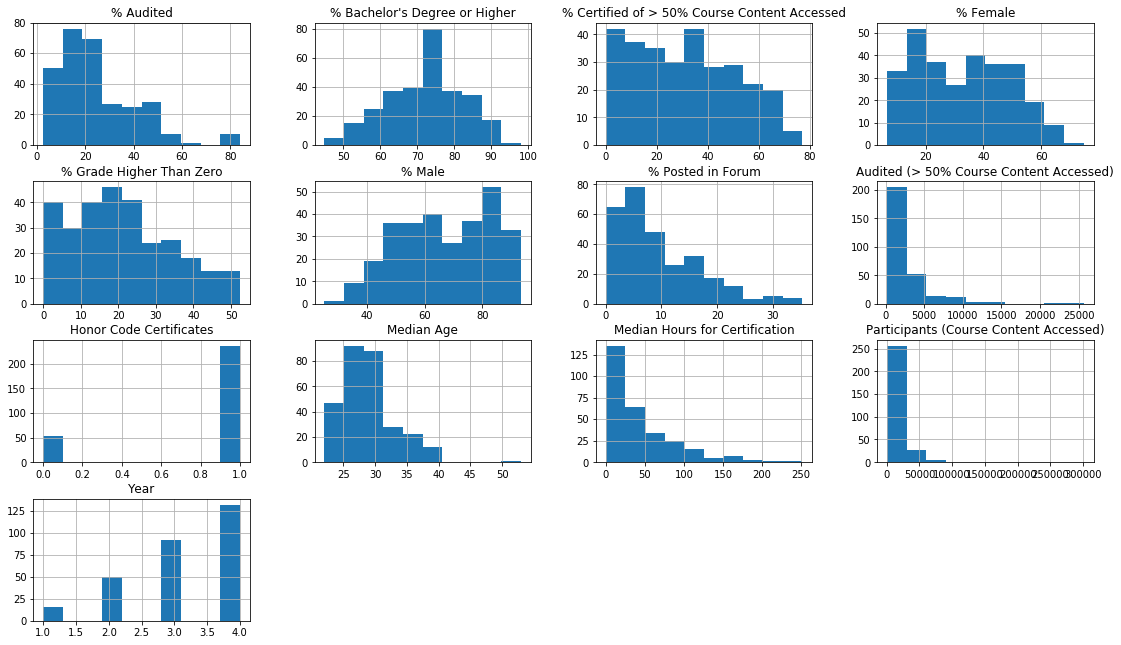

In [21]:
# graphical form

kaggle.hist(figsize=(19,11))
plt.show()

## Observations :
Not even single graph is following normal distribution(i will deal in it in transformation section)

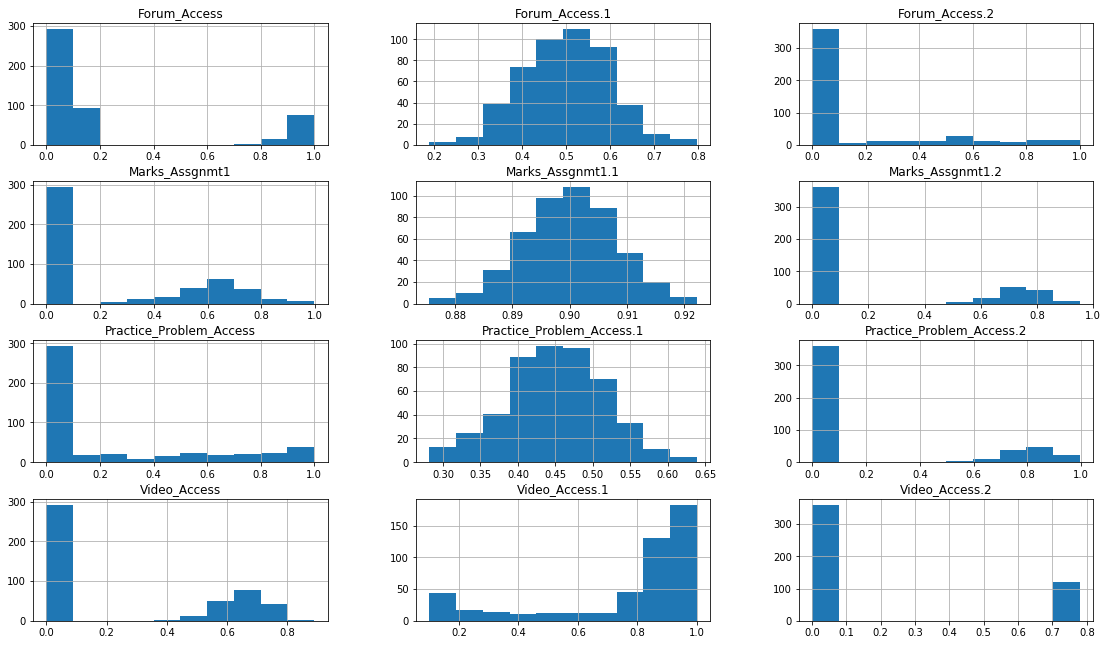

In [22]:
# graphical form

college.hist(figsize=(19,11))
plt.show()

## Observations :
Out of all graph three of them are following normal distribution:<br/>
1. Forum_Access.1
2. Marks_Assgnmt1.1
3. Practice_Problem_Access.1

# 4.Bivariate Analysis:

In [23]:
# checking the strength of two variables

kaggle.corr()

,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),% Audited,% Certified of > 50% Course Content Accessed,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
Year,1.000000,-0.369017,-0.243030,-0.298917,0.241117,-0.435351,-0.211253,-0.325424,0.017307,-0.090075,-0.044584,0.044584,0.058891
Honor Code Certificates,-0.369017,1.000000,0.134161,0.174369,0.042920,0.530508,0.042586,0.276590,-0.027182,-0.010522,-0.010452,0.010452,-0.022623
Participants (Course Content Accessed),-0.243030,0.134161,1.000000,0.847322,-0.285248,-0.030588,-0.082588,-0.064438,-0.028065,-0.147049,0.160074,-0.160074,-0.267389
Audited (> 50% Course Content Accessed),-0.298917,0.174369,0.847322,1.000000,-0.073175,0.034473,0.042764,0.109664,-0.110162,-0.059283,0.101182,-0.101182,-0.111676
% Audited,0.241117,0.042920,-0.285248,-0.073175,1.000000,-0.084667,0.103047,0.142404,-0.467050,0.340183,-0.267938,0.267938,0.439200
% Certified of > 50% Course Content Accessed,-0.435351,0.530508,-0.030588,0.034473,-0.084667,1.000000,0.390246,0.664573,-0.005280,0.173132,-0.232383,0.232383,0.100555
% Posted in Forum,-0.211253,0.042586,-0.082588,0.042764,0.103047,0.390246,1.000000,0.488611,-0.179442,0.395985,-0.423630,0.423630,0.216679
% Grade Higher Than Zero,-0.325424,0.276590,-0.064438,0.109664,0.142404,0.664573,0.488611,1.000000,-0.045449,0.185298,-0.185037,0.185037,0.209471
Median Hours for Certification,0.017307,-0.027182,-0.028065,-0.110162,-0.467050,-0.005280,-0.179442,-0.045449,1.000000,-0.477726,0.503110,-0.503110,-0.346404
Median Age,-0.090075,-0.010522,-0.147049,-0.059283,0.340183,0.173132,0.395985,0.185298,-0.477726,1.000000,-0.686789,0.686789,0.636750


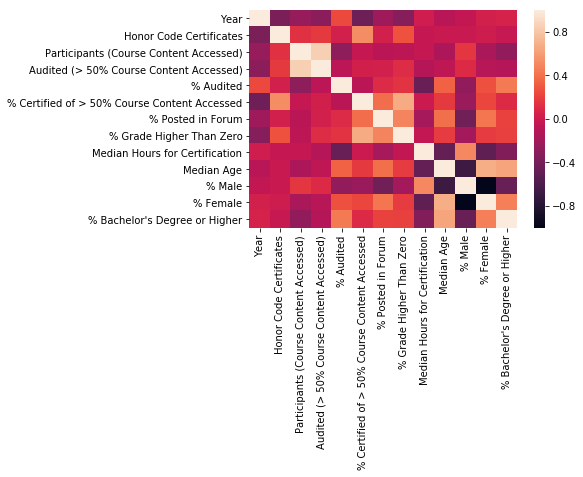

In [24]:
sns.heatmap(kaggle.corr())

## Observation :

% male and % female are perfectly correlated and value equal to -1

In [25]:
# checking relation between each of the variables

college.corr()

,Video_Access,Practice_Problem_Access,Forum_Access,Marks_Assgnmt1,Video_Access.1,Practice_Problem_Access.1,Forum_Access.1,Marks_Assgnmt1.1,Video_Access.2,Practice_Problem_Access.2,Forum_Access.2,Marks_Assgnmt1.2
Video_Access,1.000000,0.866948,0.689252,0.943482,0.025452,-0.021968,-0.013713,-0.052745,-0.090738,-0.094953,-0.062329,-0.097664
Practice_Problem_Access,0.866948,1.000000,0.638265,0.831423,0.046754,-0.011590,-0.000288,-0.060217,-0.054531,-0.056636,-0.025545,-0.060803
Forum_Access,0.689252,0.638265,1.000000,0.653565,0.060051,-0.015161,-0.037287,-0.078874,-0.135175,-0.134679,-0.121211,-0.133751
Marks_Assgnmt1,0.943482,0.831423,0.653565,1.000000,0.020186,-0.015287,0.041658,-0.073151,-0.071243,-0.073108,-0.046138,-0.079272
Video_Access.1,0.025452,0.046754,0.060051,0.020186,1.000000,-0.039696,0.034821,-0.092737,0.013902,0.019124,-0.032746,0.028164
Practice_Problem_Access.1,-0.021968,-0.011590,-0.015161,-0.015287,-0.039696,1.000000,0.025992,0.083503,-0.015449,-0.021644,-0.002370,-0.012128
Forum_Access.1,-0.013713,-0.000288,-0.037287,0.041658,0.034821,0.025992,1.000000,-0.012768,0.006719,0.021910,0.000601,0.007279
Marks_Assgnmt1.1,-0.052745,-0.060217,-0.078874,-0.073151,-0.092737,0.083503,-0.012768,1.000000,-0.087969,-0.087026,-0.093571,-0.088017
Video_Access.2,-0.090738,-0.054531,-0.135175,-0.071243,0.013902,-0.015449,0.006719,-0.087969,1.000000,0.989683,0.907977,0.991046
Practice_Problem_Access.2,-0.094953,-0.056636,-0.134679,-0.073108,0.019124,-0.021644,0.021910,-0.087026,0.989683,1.000000,0.895870,0.980642


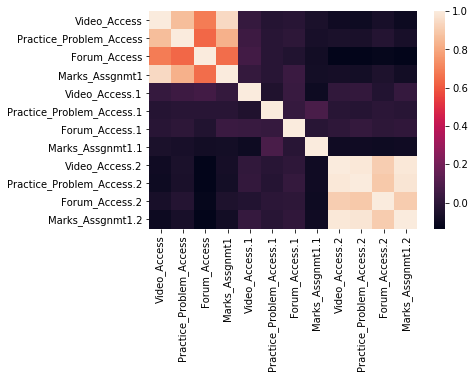

In [26]:
sns.heatmap(college.corr())

## Observation :

Video_Access,Practice_Problem_Access,Marks_Assgnmt1 are strongly correlated with each other.<br/>
Video_Access.2,Practice_Problem_Access.2,Forum_Access.2,Marks_Assgnmt1.2 are also strongly correlated with each other.

# 5. Missing Value Treatment :

1. For Kaggle dataset, this step is not required because there is no missing values
2. For college dataset,i had performed this step in section 2(variables identification)

# 6. Outlier Treatment

i am using formula to remove outliers from top and bottom of box plot<br/>
<b>from top : Q3+1.5*(Q3-Q1)</b><br/>
<b>from bottom : Q1-1.5*(Q3-Q1)</b>

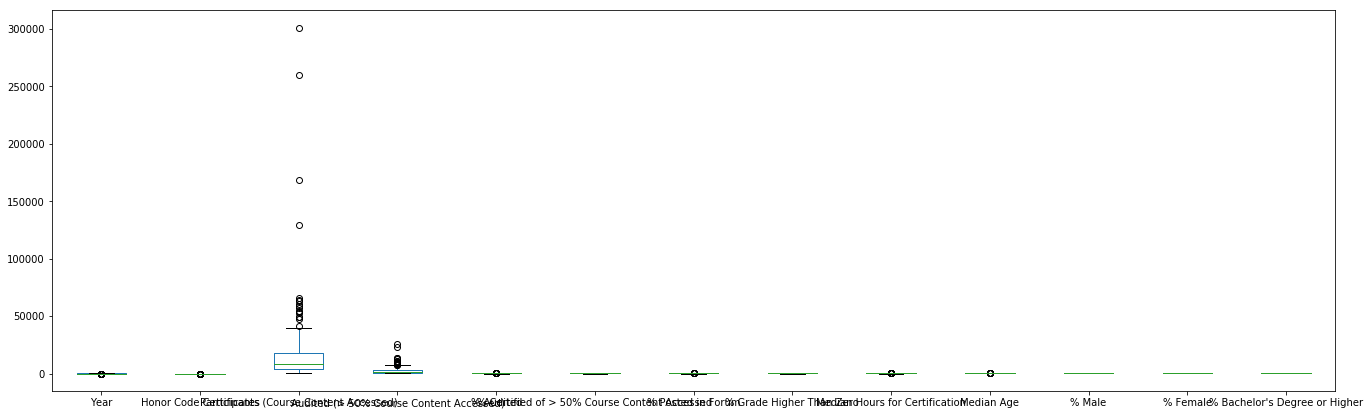

In [27]:
# checking outliers

kaggle.plot.box(figsize=(23,7))

In [28]:
# removing outliers

kaggle.loc[(kaggle['Participants (Course Content Accessed)']>22000),'Participants (Course Content Accessed)']=kaggle['Participants (Course Content Accessed)'].mean()
kaggle.loc[(kaggle['Audited (> 50% Course Content Accessed)']>4000),'Audited (> 50% Course Content Accessed)']=kaggle['Audited (> 50% Course Content Accessed)'].mean()

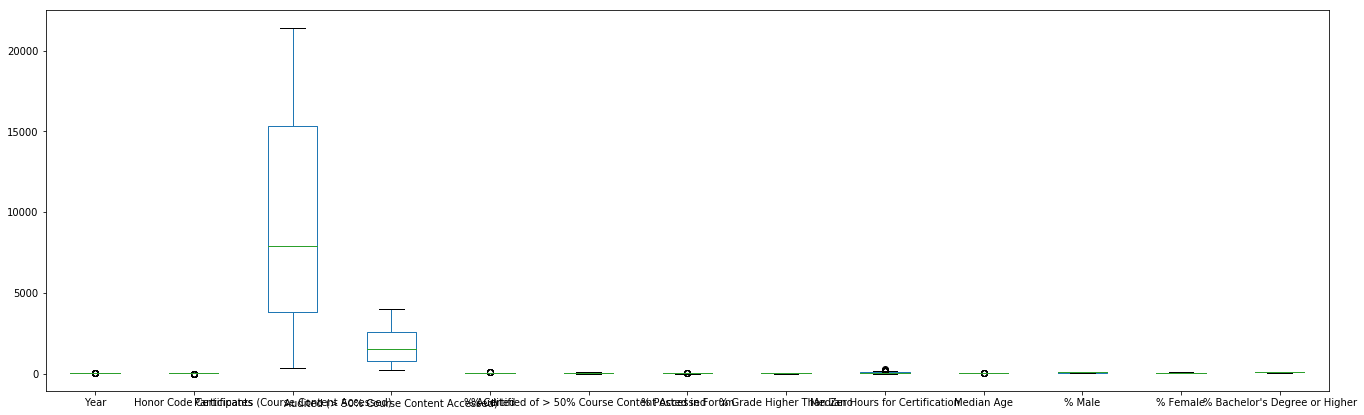

In [29]:
# no outliers

kaggle.plot.box(figsize=(23,7))

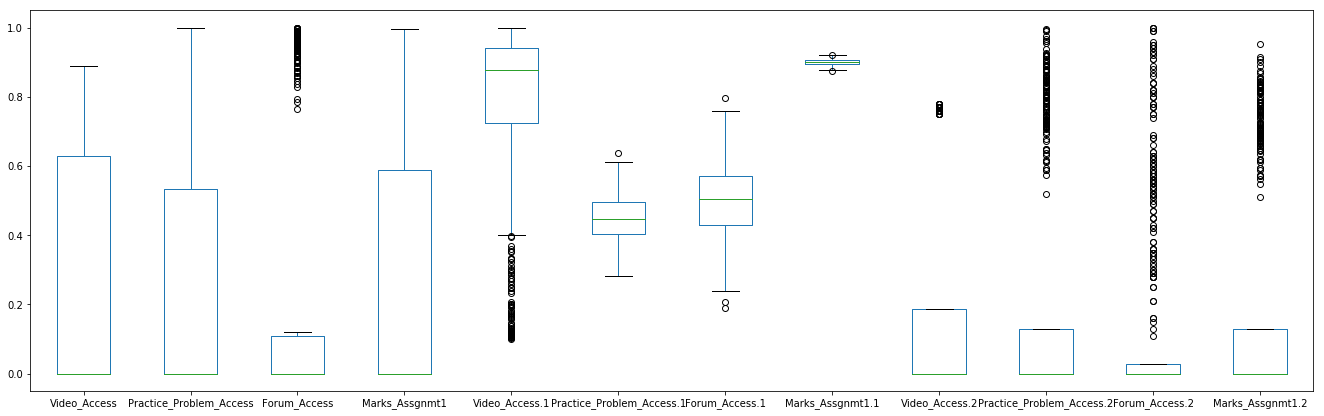

In [30]:
# checking outliers

college.plot.box(figsize=(23,7))

In [31]:
# removing outliers

college.loc[(college['Forum_Access']>0.17),'Forum_Access']=college['Forum_Access'].mean()
college.loc[(college['Video_Access.1']<0.5),'Video_Access.1']=college['Video_Access.1'].mean()
college.loc[(college['Practice_Problem_Access.2']>0.324),'Practice_Problem_Access.2']=college['Practice_Problem_Access.2'].mean()
college.loc[(college['Forum_Access.2']>0.05),'Forum_Access.2']=college['Forum_Access.2'].mean()
college.loc[(college['Marks_Assgnmt1.2']>0.27),'Marks_Assgnmt1.2']=college['Marks_Assgnmt1.2'].mean()

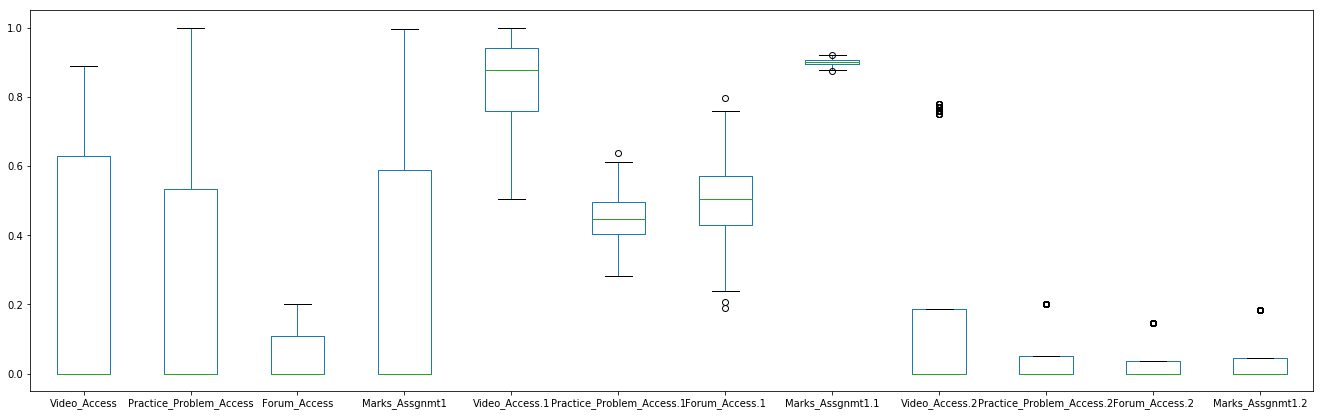

In [32]:
# now no outliers

college.plot.box(figsize=(23,7))

## 7. Transformation:

In [33]:
y_course=kaggle['Course Subject']

In [34]:
# converting 'object' type into 'int' type

from sklearn.preprocessing import LabelEncoder

col=['Institution','Course Subject','% Played Video']

le=LabelEncoder()

for i in col:
    kaggle[i]=le.fit_transform(kaggle[i]).astype(np.int64)

In [35]:
# separating independent and dependent variables:

y=kaggle['Course Subject']
x=kaggle.drop('Course Subject',1)

In [36]:
# mapping value

dict={'Course Subject':y_course,'Numerical_Course_Subject':y}
y_df=pd.DataFrame(dict)
y_df

,Course Subject,Numerical_Course_Subject
0,"Science, Technology, Engineering, and Mathematics",3
1,Computer Science,0
2,"Science, Technology, Engineering, and Mathematics",3
3,Computer Science,0
4,"Government, Health, and Social Science",1
5,Computer Science,0
6,"Science, Technology, Engineering, and Mathematics",3
7,"Government, Health, and Social Science",1
8,"Science, Technology, Engineering, and Mathematics",3
9,"Humanities, History, Design, Religion, and Edu...",2


In [37]:
# now tranforming all values of kaggle columns between 0 and 1

from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()

x[x.columns.tolist()]=ms.fit_transform(x[x.columns.tolist()])

C:\Users\uttamraj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:
# all values are in between 0 and 1

x.head()

,Institution,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),% Audited,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,1.0,0.0,1.0,0.712026,0.624583,0.152588,0.713192,0.975089,0.231576,0.553391,0.255937,0.129032,0.924340,0.075660,0.295899
1,1.0,0.0,1.0,0.712026,0.624583,0.143121,0.830847,1.000000,0.407596,0.754537,0.311850,0.193548,0.854252,0.145748,0.340293
2,1.0,0.0,1.0,0.774528,0.705447,0.178286,0.944999,0.996441,0.408730,0.666476,0.243348,0.161290,0.660997,0.339003,0.259782
3,0.0,0.0,1.0,0.712026,0.624583,0.090127,0.144117,0.003559,0.000000,0.021203,0.000000,0.193548,0.803226,0.196774,0.260158
4,0.0,0.0,1.0,0.712026,0.624583,0.218984,0.611234,0.907473,0.452948,0.621203,0.302200,0.322581,0.462463,0.537537,0.816027


# 8. Modeling :

In [39]:
# now separating train and test dataset

x_train=x[:261]
x_test=x[261:]

In [40]:
y_train=y[:261]
y_test=y[261:]

In [41]:
# forming the model,fitting the model and then predicting the subject and then checking the accuracy

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

Classifiers=['LogisticRegression','GBC','ABC']

models=[LogisticRegression(),GradientBoostingClassifier(n_estimators=250,max_depth=3,learning_rate=0.01),
        AdaBoostClassifier(n_estimators=250,learning_rate=0.01)]

accuracy=[]
roc=[]

for i in models:
    mod=i
    fit=mod.fit(x_train,y_train)
    predict=fit.predict(x_test)
    accuracy.append(accuracy_score(y_test,predict))
    
pd.DataFrame(accuracy,index=Classifiers,columns=['accuracy'])

C:\Users\uttamraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uttamraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,accuracy
LogisticRegression,0.724138
GBC,0.724138
ABC,0.413793


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200)
fit=rf_model.fit(x_train,y_train)
y_pred=fit.predict(x_test)
accuracy_score(y_test,y_pred)

0.8275862068965517

In [43]:
lg=LogisticRegression()
fit1=lg.fit(x_train,y_train)
y_pred1=fit.predict(x_test)
accuracy_score(y_test,y_pred1)

C:\Users\uttamraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\uttamraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8275862068965517

In [44]:
y_pred1=pd.Series(y_pred1)

In [45]:
print(y_test,y_pred1)

261    0
262    2
263    3
264    2
265    1
266    2
267    2
268    3
269    1
270    0
271    3
272    3
273    2
274    3
275    0
276    3
277    1
278    3
279    1
280    3
281    3
282    3
283    2
284    2
285    2
286    2
287    3
288    3
289    3
Name: Course Subject, dtype: int64 0     1
1     3
2     3
3     2
4     1
5     2
6     2
7     1
8     1
9     0
10    2
11    3
12    2
13    3
14    0
15    3
16    1
17    3
18    1
19    3
20    3
21    3
22    2
23    1
24    2
25    2
26    3
27    3
28    3
dtype: int64


In [46]:
percent=lambda x: len([w for w in y_df['Numerical_Course_Subject'] if w==x])*100/(y_df.shape[0])

result=list(map(percent,[0,1,2,3]))
result

[10.344827586206897, 25.862068965517242, 32.41379310344828, 31.379310344827587]

Computer Science:0<br/>
Government, Health, and Social Science:1<br/>
Humanities, History, Design, Religion, and Edu...:2<br/>
Science, Technology, Engineering, and Mathematics:3

college 1: prefer for BioTechnology<br/>
college 2: prefer for Electrical and Electronic Engineering